In [1]:
from IPython.display import display, Image, Audio
import cv2
import base64
import time
from cap_from_youtube import cap_from_youtube
from openai import OpenAI

GPT-4V doesn't take videos as input directly, so we extract frames from video

In [2]:
youtube_url = "https://youtu.be/GvJtVOmFs5Q?si=5qJripJKpm3kBZQR"
cap = cap_from_youtube(youtube_url)
base64Frames = []

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    _, buffer = cv2.imencode('.jpg', frame)
    base64Frames.append(base64.b64encode(buffer).decode('utf-8'))
    
cap.release()
print(len(base64Frames), "frames read.")

[youtube] Extracting URL: https://youtu.be/GvJtVOmFs5Q?si=5qJripJKpm3kBZQR
[youtube] GvJtVOmFs5Q: Downloading webpage
[youtube] GvJtVOmFs5Q: Downloading ios player API JSON
[youtube] GvJtVOmFs5Q: Downloading android player API JSON
[youtube] GvJtVOmFs5Q: Downloading m3u8 information
705 frames read.


Display frames to make sure we have read them correctly.

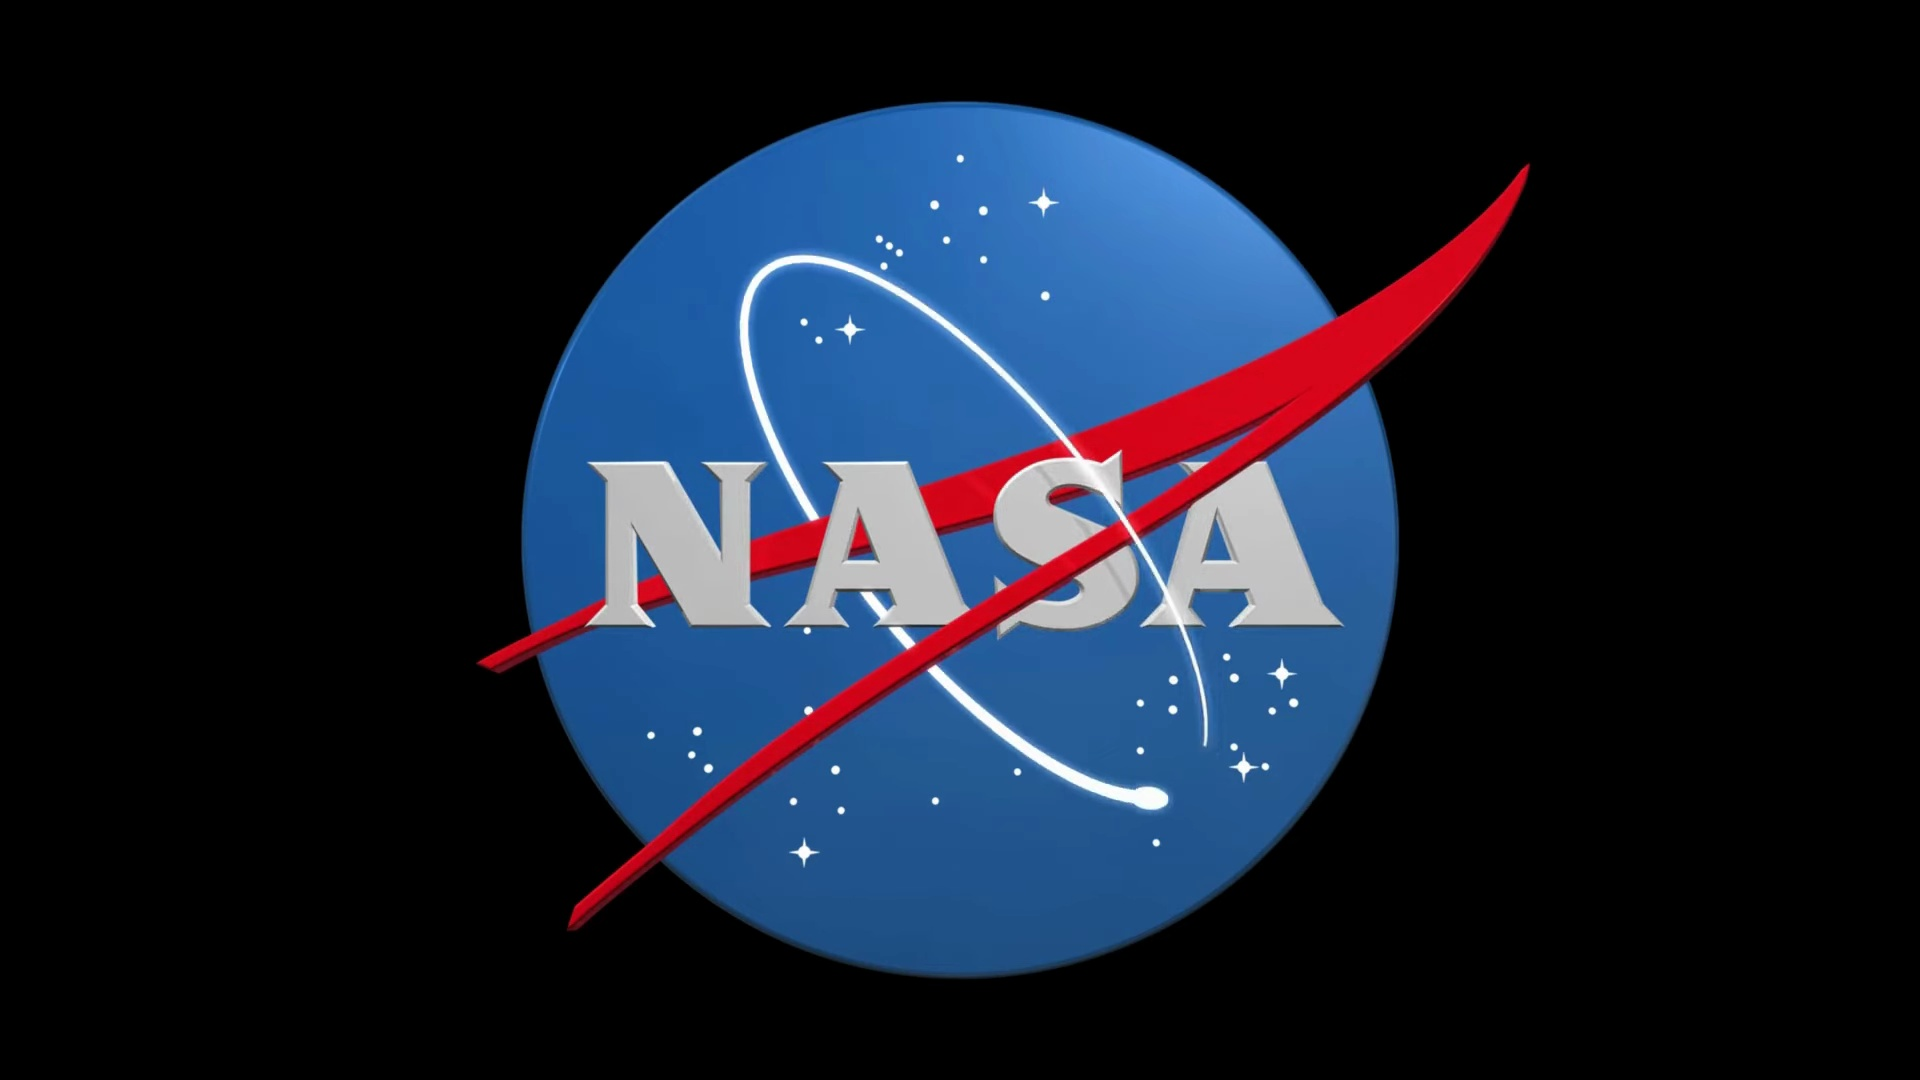

In [3]:
display_handle = display(None, display_id=True)

for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode('utf-8'))))
    time.sleep(1/30) # 30 FPS

In [4]:
client = OpenAI()

We don't need to send every frame for GPT-4V to understand what's going on.
We will send every 100th frame.

In [5]:
messages = [
    {'role': 'user',
     'content': [
         "These are frames from a video that I want you generate a compelling description of the video.",
         * map(lambda x: {'image': x, 'resize': 768}, base64Frames[0::100]),
     ],
    },
]

params = {
    'model': 'gpt-4-vision-preview',
    'messages': messages,
    'max_tokens': 150,
}


In [6]:
response = client.chat.completions.create(**params)

In [7]:
print(response.choices[0].message.content)

Based on the frames provided, the video appears to be a creative and humorous take on a mission control monitoring scenario, with the "subject" being a domestic cat on a couch. The concept seems to blend elements of a typical space mission with the everyday antics of a household pet. Imagery commonly associated with NASA and aerospace telemetry overlays the footage of the cat, including target markers, technical gauges, and symbols that are suggestive of a high-tech observation or tracking interface.

The playful mix of high technology with the laid-back attitude of a cat lounging on furniture offers a comedic contrast—an ordinary feline treated with the seriousness and precision typically reserved for interstellar exploration. The NASA logo animation sequence towards the end of the series further suggests that the video may
